<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_2_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n20.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,314.294748,553.781179,255.342677,298.438502
1,0.0,1.0,41.321385,70.807138,64.285975,-274.390429,-87.975930,185.494283,-273.470213
2,0.0,2.0,97.569298,71.702146,80.680950,133.081279,393.033674,291.897354,101.136319
3,0.0,3.0,95.847263,60.930988,21.264605,151.031076,339.073932,202.842459,136.231473
4,0.0,4.0,36.355496,24.921419,84.847584,-25.441856,130.682644,152.936133,-22.253489
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-149.116913,74.924522,210.166238,-135.241716
249996,999.0,246.0,35.459513,28.969407,64.695515,25.797248,164.921683,128.797465,36.124218
249997,999.0,247.0,60.281445,89.820202,64.100453,-27.278643,196.923457,212.863610,-15.940153
249998,999.0,248.0,29.142842,36.286090,55.851661,-102.843056,28.437537,116.246952,-87.809414


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,314.294748,553.781179,255.342677,298.438502
1,0.0,1.0,41.321385,70.807138,64.285975,-274.390429,-87.975930,185.494283,-273.470213
2,0.0,2.0,97.569298,71.702146,80.680950,133.081279,393.033674,291.897354,101.136319
3,0.0,3.0,95.847263,60.930988,21.264605,151.031076,339.073932,202.842459,136.231473
4,0.0,4.0,36.355496,24.921419,84.847584,-25.441856,130.682644,152.936133,-22.253489
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-149.116913,74.924522,210.166238,-135.241716
249996,999.0,246.0,35.459513,28.969407,64.695515,25.797248,164.921683,128.797465,36.124218
249997,999.0,247.0,60.281445,89.820202,64.100453,-27.278643,196.923457,212.863610,-15.940153
249998,999.0,248.0,29.142842,36.286090,55.851661,-102.843056,28.437537,116.246952,-87.809414


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    56.430038  74.617667  ...  255.342677  298.438502
      1.0    41.321385  70.807138  ...  185.494283 -273.470213
      2.0    97.569298  71.702146  ...  291.897354  101.136319
      3.0    95.847263  60.930988  ...  202.842459  136.231473
      4.0    36.355496  24.921419  ...  152.936133  -22.253489
...                ...        ...  ...         ...         ...
999.0 245.0  96.120114  89.727149  ...  210.166238 -135.241716
      246.0  35.459513  28.969407  ...  128.797465   36.124218
      247.0  60.281445  89.820202  ...  212.863610  -15.940153
      248.0  29.142842  36.286090  ...  116.246952  -87.809414
      249.0  30.233196  79.460010  ...  118.714271 -456.971862

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    56.430038  74.617667  ...  255.342677  298.438502
      1.0    41.321385  70.807138  ...  185.494283 -273.470213
      2.0    97.569298  71.702146  ...  291.897354  101.136319
      3.0    95.847263  60.930988  ...  202.842459  136.231473
      4.0    36.355496  24.921419  ...  152.936133  -22.253489
...                ...        ...  ...         ...         ...
999.0 245.0  96.120114  89.727149  ...  210.166238 -135.241716
      246.0  35.459513  28.969407  ...  128.797465   36.124218
      247.0  60.281445  89.820202  ...  212.863610  -15.940153
      248.0  29.142842  36.286090  ...  116.246952  -87.809414
      249.0  30.233196  79.460010  ...  118.714271 -456.971862

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,56.430038,74.617667,98.438727,314.294748,553.781179,255.342677,298.438502
1,0.0,1.0,41.321385,70.807138,64.285975,-274.390429,-87.975930,185.494283,-273.470213
2,0.0,2.0,97.569298,71.702146,80.680950,133.081279,393.033674,291.897354,101.136319
3,0.0,3.0,95.847263,60.930988,21.264605,151.031076,339.073932,202.842459,136.231473
4,0.0,4.0,36.355496,24.921419,84.847584,-25.441856,130.682644,152.936133,-22.253489
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.120114,89.727149,28.194171,-149.116913,74.924522,210.166238,-135.241716
249996,999.0,246.0,35.459513,28.969407,64.695515,25.797248,164.921683,128.797465,36.124218
249997,999.0,247.0,60.281445,89.820202,64.100453,-27.278643,196.923457,212.863610,-15.940153
249998,999.0,248.0,29.142842,36.286090,55.851661,-102.843056,28.437537,116.246952,-87.809414


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    56.430038  74.617667  ...  255.342677  298.438502
      1.0    41.321385  70.807138  ...  185.494283 -273.470213
      2.0    97.569298  71.702146  ...  291.897354  101.136319
      3.0    95.847263  60.930988  ...  202.842459  136.231473
      4.0    36.355496  24.921419  ...  152.936133  -22.253489
...                ...        ...  ...         ...         ...
999.0 245.0  96.120114  89.727149  ...  210.166238 -135.241716
      246.0  35.459513  28.969407  ...  128.797465   36.124218
      247.0  60.281445  89.820202  ...  212.863610  -15.940153
      248.0  29.142842  36.286090  ...  116.246952  -87.809414
      249.0  30.233196  79.460010  ...  118.714271 -456.971862

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

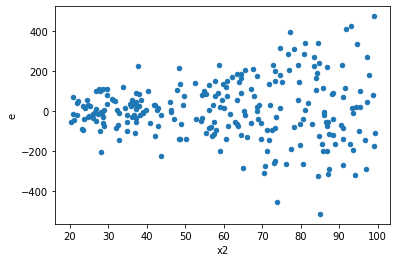

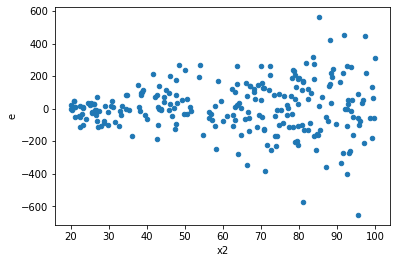

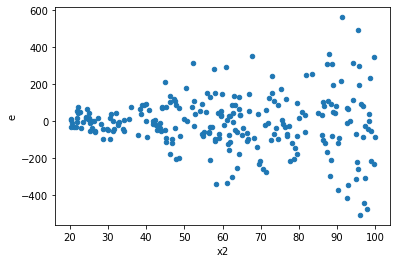

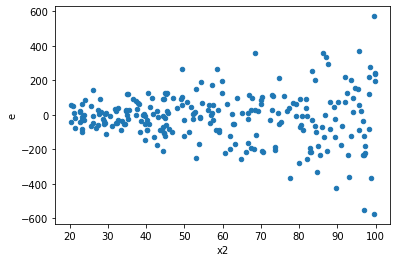

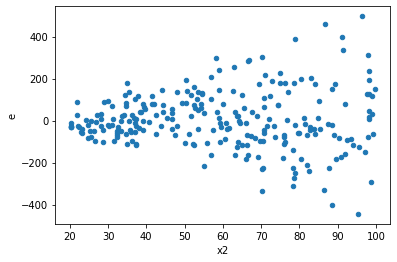

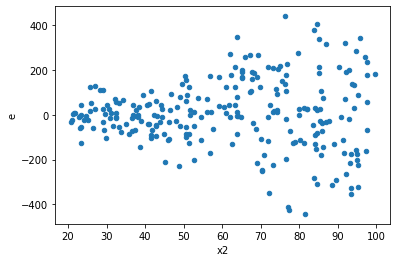

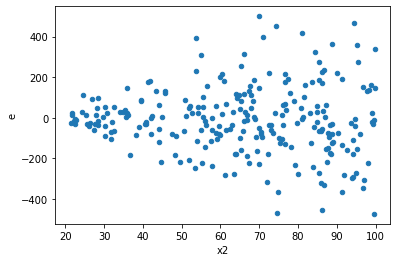

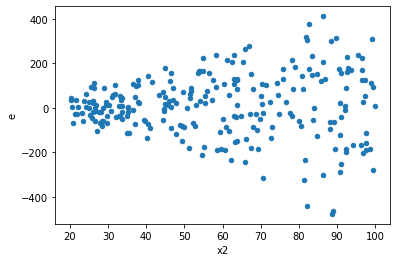

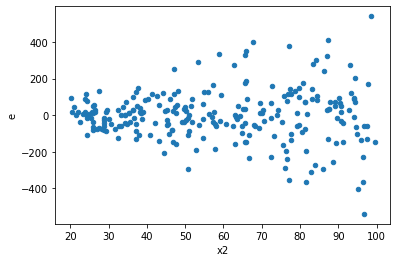

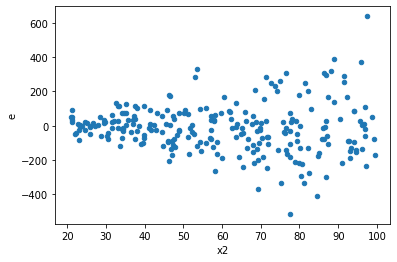

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,4138967.6445674724,590666.088934228,43114.24629757784,6152.771759731542,7.007288419139896,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,4128164.8737537223,649770.8613573571,43001.71743493461,6768.44647247247,6.353262541090371,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,3988419.769926025,573623.7714907097,41546.03927006276,5975.247619694893,6.953023860153293,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,4008077.580180205,509151.598943222,41750.808126877135,5303.662488991896,7.872071085506235,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,3387620.5548257404,426673.05514242454,35287.71411276813,4444.5109910669225,7.939616795569488,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,3917095.0037346105,525156.550147664,40803.07295556886,5470.380730704834,7.458909162673869,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,4168829.4552302454,1236011.980246549,43425.306825315056,12875.124794234885,3.372806673280532,6.557353771086127e-09,0.9999999967213231,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3555951.158939249,429788.2471366563,37041.157905617176,4476.960907673503,8.273728243221578,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,3258411.629905679,578429.007392563,33941.78781151749,6025.302160339198,5.6332092413447885,8.881784197001252e-16,0.9999999999999996,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4138967.6445674724,590666.088934228,43114.24629757784,6152.771759731542,7.007288419139896,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,4128164.8737537223,649770.8613573571,43001.71743493461,6768.44647247247,6.353262541090371,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,3988419.769926025,573623.7714907097,41546.03927006276,5975.247619694893,6.953023860153293,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,4008077.580180205,509151.598943222,41750.808126877135,5303.662488991896,7.872071085506235,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,3387620.5548257404,426673.05514242454,35287.71411276813,4444.5109910669225,7.939616795569488,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,3917095.0037346105,525156.550147664,40803.07295556886,5470.380730704834,7.458909162673869,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,4168829.4552302454,1236011.980246549,43425.306825315056,12875.124794234885,3.372806673280532,6.557353771086127e-09,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3555951.158939249,429788.2471366563,37041.157905617176,4476.960907673503,8.273728243221578,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,3258411.629905679,578429.007392563,33941.78781151749,6025.302160339198,5.6332092413447885,8.881784197001252e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64